In [7]:
#21 Train a KNN Classifier on the Iris dataset and print model accuracy.
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a KNN Classifier with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Classifier Accuracy: {accuracy:.2f}")


KNN Classifier Accuracy: 1.00


KNN Regressor Mean Squared Error: 437.35


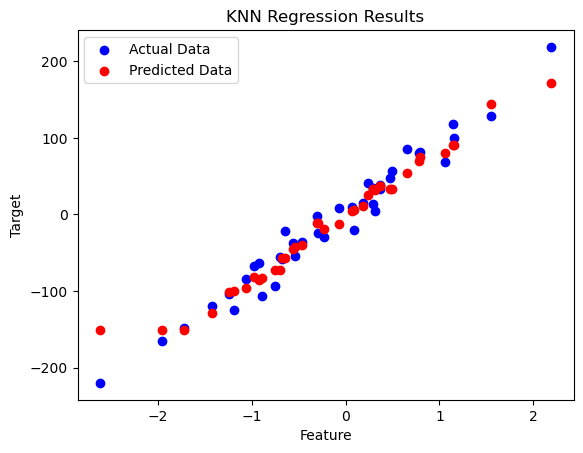

In [9]:
#22. # Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Generate a synthetic regression dataset
X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a KNN Regressor with K=5
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_reg.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"KNN Regressor Mean Squared Error: {mse:.2f}")

# Plot the regression results
plt.scatter(X_test, y_test, color='blue', label="Actual Data")
plt.scatter(X_test, y_pred, color='red', label="Predicted Data")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("KNN Regression Results")
plt.legend()
plt.show()


In [11]:
#23 Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN Classifier with Euclidean distance
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)

# Train KNN Classifier with Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)

# Print accuracy comparison
print(f"KNN Accuracy (Euclidean Distance): {accuracy_euclidean:.2f}")
print(f"KNN Accuracy (Manhattan Distance): {accuracy_manhattan:.2f}")


KNN Accuracy (Euclidean Distance): 1.00
KNN Accuracy (Manhattan Distance): 1.00


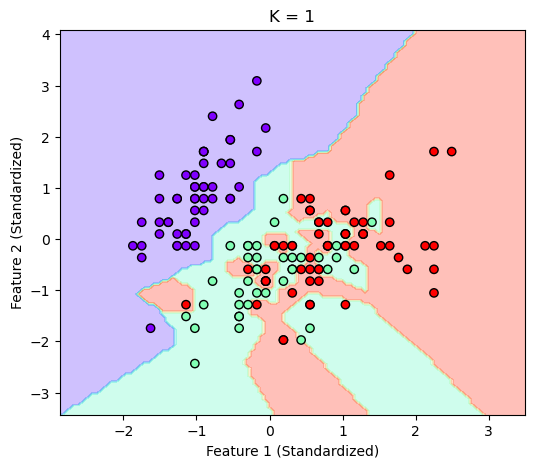

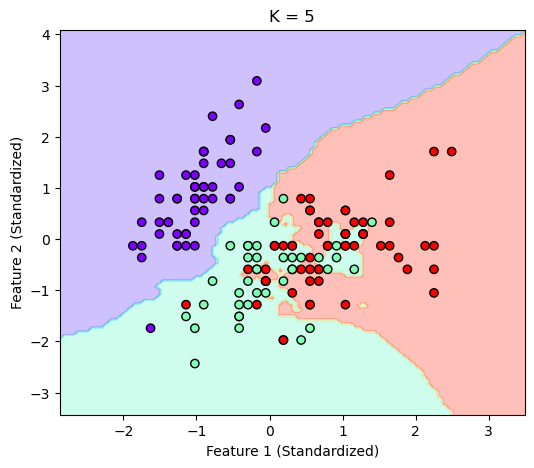

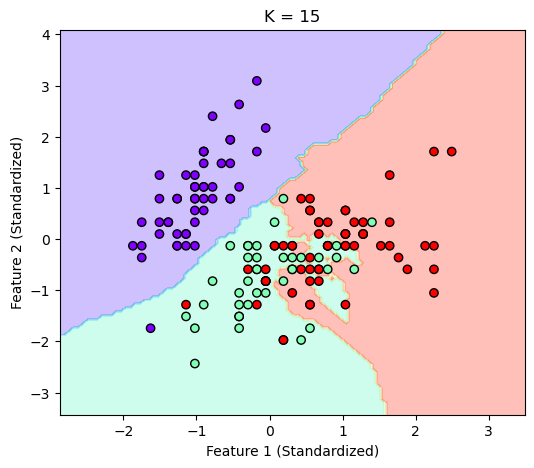

In [17]:
#24 Train a KNN Classifier with different values of K and visualize decision boundarie.
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features for visualization
y = iris.target       # Target labels

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to plot decision boundaries
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Predict class for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.rainbow)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.rainbow)
    plt.title(title)
    plt.xlabel("Feature 1 (Standardized)")
    plt.ylabel("Feature 2 (Standardized)")
    plt.show()

# Try different values of K
k_values = [1, 5, 15]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    plot_decision_boundary(X, y, knn, f"K = {k}")


In [21]:
#25 Apply Feature Scaling before training a KNN model and compare results with unscaled data
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Use all features
y = iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN WITHOUT Feature Scaling
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

# Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN WITH Feature Scaling
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# Print Accuracy Comparison
print(f"Accuracy without Scaling: {accuracy_unscaled:.4f}")
print(f"Accuracy with Scaling: {accuracy_scaled:.4f}")


Accuracy without Scaling: 1.0000
Accuracy with Scaling: 1.0000


In [23]:
#26 Train a PCA model on synthetic data and print the explained variance ratio for each component
# Import required libraries
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Generate synthetic data (100 samples, 5 features)
np.random.seed(42)
X_synthetic = np.random.rand(100, 5) * 10  # Random values between 0 and 10

# Standardize the data before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_synthetic)

# Apply PCA
pca = PCA(n_components=5)
pca.fit(X_scaled)

# Get the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio for each PCA component:")
print(explained_variance_ratio)


Explained Variance Ratio for each PCA component:
[0.29005782 0.23214006 0.18701323 0.15426411 0.13652477]


In [26]:
#27 Apply PCA before training a KNN Classifier and compare accuracy with and without PCA
# Import required libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Use all features
y = iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN WITHOUT PCA
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
accuracy_no_pca = accuracy_score(y_test, y_pred)

# Apply PCA (reduce to 2 principal components)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train KNN WITH PCA
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_with_pca = accuracy_score(y_test, y_pred_pca)

# Print Accuracy Comparison
print(f"Accuracy without PCA: {accuracy_no_pca:.4f}")
print(f"Accuracy with PCA: {accuracy_with_pca:.4f}")


Accuracy without PCA: 1.0000
Accuracy with PCA: 0.9333


In [30]:
#28 Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV
# Import required libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Use all features
y = iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define KNN Classifier
knn = KNeighborsClassifier()

# Define hyperparameters for tuning
param_grid = {
    'n_neighbors': range(1, 21),  # Try K values from 1 to 20
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metrics
    'weights': ['uniform', 'distance']  # Weighting strategies
}

# Apply GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get best parameters and best model
best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_

# Evaluate on test data
y_pred = best_knn.predict(X_test_scaled)
best_accuracy = accuracy_score(y_test, y_pred)

# Print Results
print(f"Best Parameters: {best_params}")
print(f"Best Model Accuracy: {best_accuracy:.4f}")


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best Model Accuracy: 1.0000


In [32]:
#29 Train a KNN Classifier and check the number of misclassified samples
# Import required libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Use all features
y = iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = knn.predict(X_test_scaled)

# Count misclassified samples
misclassified_samples = (y_pred != y_test).sum()

# Print Results
print(f"Total test samples: {len(y_test)}")
print(f"Number of misclassified samples: {misclassified_samples}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Total test samples: 30
Number of misclassified samples: 0
Accuracy: 1.0000


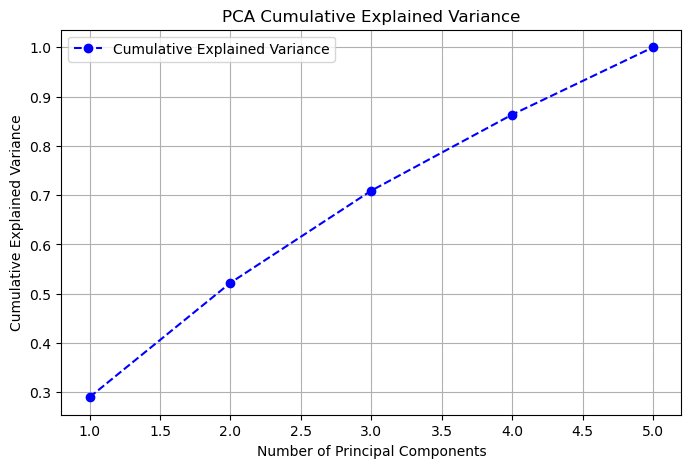

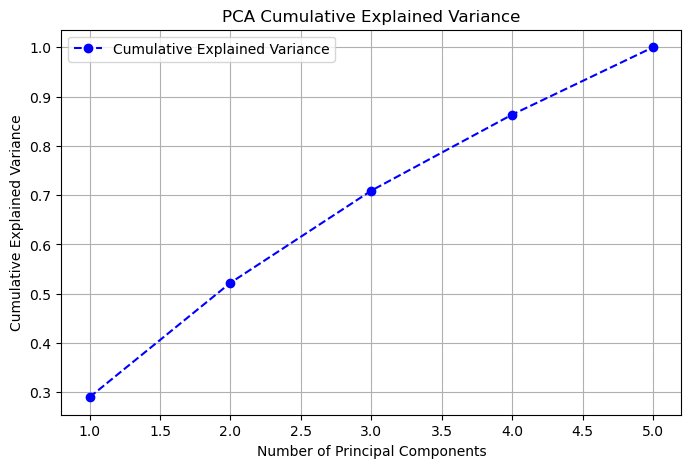

In [38]:
#30 Train a PCA model and visualize the cumulative explained variance.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Generate synthetic data (100 samples, 5 features)
np.random.seed(42)
X_synthetic = np.random.rand(100, 5) * 10  # Random values between 0 and 10

# Standardize the data before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_synthetic)

# Apply PCA
pca = PCA(n_components=5)
pca.fit(X_scaled)

# Compute cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cumulative_variance, marker='o', linestyle='--', color='b', label="Cumulative Explained Variance")
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance')
plt.grid(True)
plt.legend()
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Generate synthetic data (100 samples, 5 features)
np.random.seed(42)
X_synthetic = np.random.rand(100, 5) * 10  # Random values between 0 and 10

# Standardize the data before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_synthetic)

# Apply PCA
pca = PCA(n_components=5)
pca.fit(X_scaled)

# Compute cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cumulative_variance, marker='o', linestyle='--', color='b', label="Cumulative Explained Variance")
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance')
plt.grid(True)
plt.legend()
plt.show()
 

In [3]:
#31 Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy

# Import necessary libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Use all features
y = iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN with uniform weights (all neighbors equally important)
knn_uniform = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_uniform.fit(X_train_scaled, y_train)
y_pred_uniform = knn_uniform.predict(X_test_scaled)
accuracy_uniform = accuracy_score(y_test, y_pred_uniform)

# Train KNN with distance-based weights (closer neighbors have higher influence)
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_distance.fit(X_train_scaled, y_train)
y_pred_distance = knn_distance.predict(X_test_scaled)
accuracy_distance = accuracy_score(y_test, y_pred_distance)

# Print results
print(f"Accuracy with uniform weights: {accuracy_uniform:.4f}")
print(f"Accuracy with distance-based weights: {accuracy_distance:.4f}")


Accuracy with uniform weights: 1.0000
Accuracy with distance-based weights: 1.0000


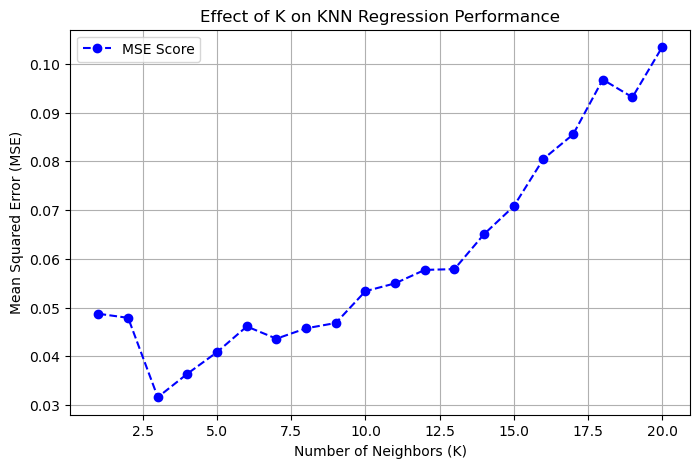

In [5]:
#32. Train a KNN Regressor and analyze the effect of different K values on performance
# Re-import required libraries after execution state reset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Generate synthetic regression data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)  # Feature: 100 values from 0 to 10
y = np.sin(X).ravel() + np.random.normal(scale=0.2, size=100)  # Target with noise

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluate KNN Regressor for different K values
k_values = range(1, 21)  # K from 1 to 20
mse_scores = []

for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train_scaled, y_train)
    y_pred = knn_regressor.predict(X_test_scaled)
    mse_scores.append(mean_squared_error(y_test, y_pred))

# Plot K vs. MSE
plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_scores, marker='o', linestyle='--', color='b', label="MSE Score")
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Effect of K on KNN Regression Performance')
plt.grid(True)
plt.legend()
plt.show()


In [7]:
#33. Implement KNN Imputation for handling missing values in a dataset
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Create a synthetic dataset with missing values
np.random.seed(42)
data = np.random.rand(10, 5) * 10  # 10 samples, 5 features

# Introduce missing values randomly
data[2, 1] = np.nan
data[4, 3] = np.nan
data[6, 0] = np.nan
data[8, 2] = np.nan

# Convert to DataFrame for better visualization
df = pd.DataFrame(data, columns=[f'Feature_{i+1}' for i in range(5)])
print("Original Data with Missing Values:\n", df)

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=3)  # Use 3 nearest neighbors for imputation
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("\nData after KNN Imputation:\n", df_imputed)


Original Data with Missing Values:
    Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
0   3.745401   9.507143   7.319939   5.986585   1.560186
1   1.559945   0.580836   8.661761   6.011150   7.080726
2   0.205845        NaN   8.324426   2.123391   1.818250
3   1.834045   3.042422   5.247564   4.319450   2.912291
4   6.118529   1.394939   2.921446        NaN   4.560700
5   7.851760   1.996738   5.142344   5.924146   0.464504
6        NaN   1.705241   0.650516   9.488855   9.656320
7   8.083973   3.046138   0.976721   6.842330   4.401525
8   1.220382   4.951769        NaN   9.093204   2.587800
9   6.625223   3.117111   5.200680   5.467103   1.848545

Data after KNN Imputation:
    Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
0   3.745401   9.507143   7.319939   5.986585   1.560186
1   1.559945   0.580836   8.661761   6.011150   7.080726
2   0.205845   4.376801   8.324426   2.123391   1.818250
3   1.834045   3.042422   5.247564   4.319450   2.912291
4   6.118529   1.394939

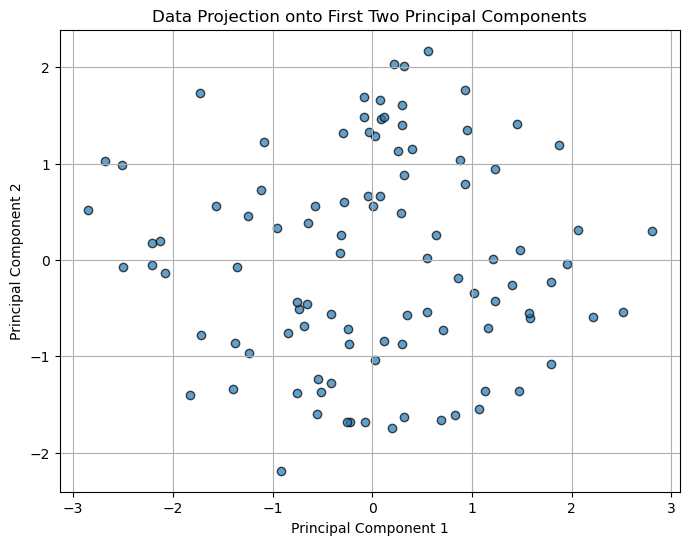

In [11]:
#34. Train a PCA model and visualize the data projection onto the first two principal components
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Generate sample data (Replace with your dataset)
np.random.seed(42)
data = np.random.rand(100, 5)  # 100 samples, 5 features

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Create a DataFrame for visualization
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.7, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Projection onto First Two Principal Components')
plt.grid()
plt.show()


In [13]:
#35 Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load dataset (Iris for demonstration)
data = load_iris()
X, y = data.data, data.target

# Split data into train and test sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate KNN with a specific algorithm
def evaluate_knn(algorithm):
    start_time = time.time()
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algorithm)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    execution_time = time.time() - start_time
    return accuracy, execution_time

# Evaluate KD Tree
kd_tree_accuracy, kd_tree_time = evaluate_knn('kd_tree')

# Evaluate Ball Tree
ball_tree_accuracy, ball_tree_time = evaluate_knn('ball_tree')

# Print results
print(f"KD Tree Accuracy: {kd_tree_accuracy:.4f}, Time: {kd_tree_time:.6f} sec")
print(f"Ball Tree Accuracy: {ball_tree_accuracy:.4f}, Time: {ball_tree_time:.6f} sec")


KD Tree Accuracy: 1.0000, Time: 0.058646 sec
Ball Tree Accuracy: 1.0000, Time: 0.011666 sec


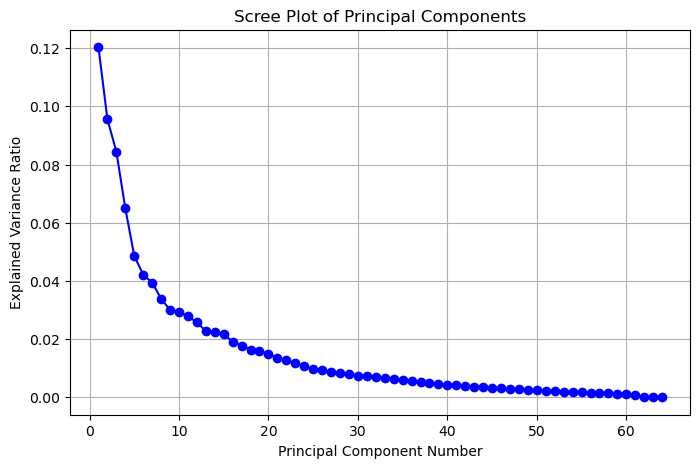

In [15]:
#36. Train a PCA model on a high-dimensional dataset and visualize the Scree plot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits

# Load a high-dimensional dataset (Digits dataset has 64 features)
digits = load_digits()
X = digits.data  # Shape: (1797, 64)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=X.shape[1])  # Full dimensionality
pca.fit(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-', color='b')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot of Principal Components')
plt.grid()
plt.show()


In [17]:
#37. Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report

# Load dataset (Iris)
data = load_iris()
X, y = data.data, data.target

# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate using Precision, Recall, and F1-Score
report = classification_report(y_test, y_pred, target_names=data.target_names)
print(report)


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



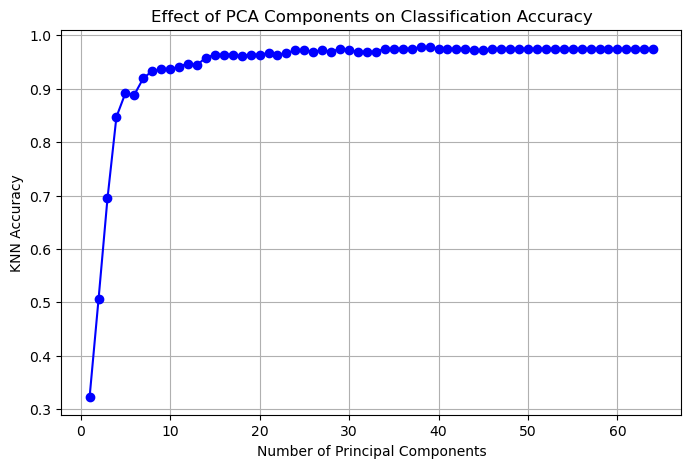

In [19]:
#38. Train a PCA model and analyze the effect of different numbers of components on accuracy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

# Load dataset (Digits: 1797 samples, 64 features)
digits = load_digits()
X, y = digits.data, digits.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Function to evaluate KNN with different PCA components
components = range(1, X.shape[1] + 1)  # Try all possible components
accuracy_scores = []

for n in components:
    # Apply PCA
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Train KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_pca, y_train)
    
    # Predict and evaluate accuracy
    y_pred = knn.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot Accuracy vs. Number of PCA Components
plt.figure(figsize=(8, 5))
plt.plot(components, accuracy_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('KNN Accuracy')
plt.title('Effect of PCA Components on Classification Accuracy')
plt.grid()
plt.show()


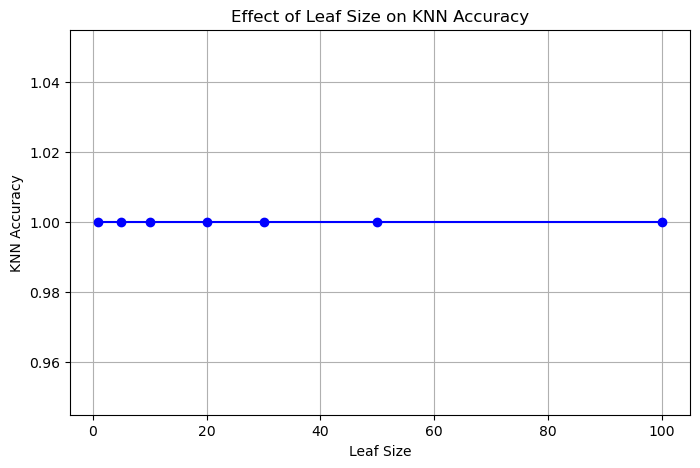

In [21]:
#39 Train a KNN Classifier with different leaf_size values and compare accuracy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset (Iris)
data = load_iris()
X, y = data.data, data.target

# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of different leaf_size values to test
leaf_sizes = [1, 5, 10, 20, 30, 50, 100]

# Store accuracy for each leaf_size
accuracy_scores = []

for leaf in leaf_sizes:
    # Train KNN with different leaf_size
    knn = KNeighborsClassifier(n_neighbors=5, leaf_size=leaf)
    knn.fit(X_train, y_train)
    
    # Predict and evaluate accuracy
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot Accuracy vs. Leaf Size
plt.figure(figsize=(8, 5))
plt.plot(leaf_sizes, accuracy_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Leaf Size')
plt.ylabel('KNN Accuracy')
plt.title('Effect of Leaf Size on KNN Accuracy')
plt.grid()
plt.show()


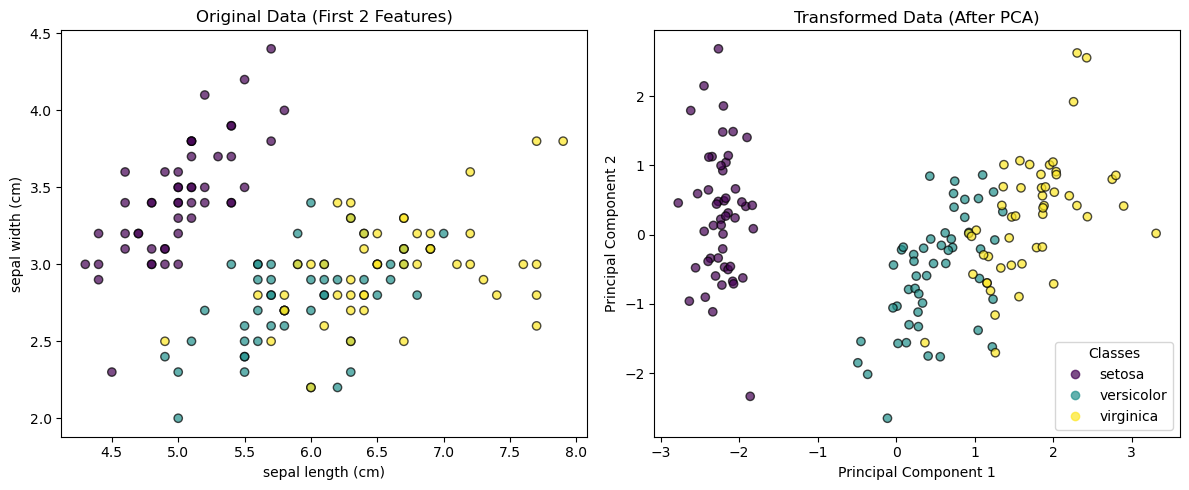

In [27]:
#40. Train a PCA model and visualize how data points are transformed before and after PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load dataset (Iris)
data = load_iris()
X, y = data.data, data.target
target_names = list(data.target_names)  # Convert to list

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (reduce to 2D for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot original data in 2D (Using first 2 features)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Original Data (First 2 Features)
scatter1 = ax[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', alpha=0.7)
ax[0].set_title("Original Data (First 2 Features)")
ax[0].set_xlabel(data.feature_names[0])
ax[0].set_ylabel(data.feature_names[1])

# Transformed Data (After PCA)
scatter2 = ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolors='k', alpha=0.7)
ax[1].set_title("Transformed Data (After PCA)")
ax[1].set_xlabel("Principal Component 1")
ax[1].set_ylabel("Principal Component 2")

# Fix: Convert target_names to a list before using it in the legend
ax[1].legend(handles=scatter2.legend_elements()[0], labels=target_names, title="Classes", loc='best')

plt.tight_layout()
plt.show()


In [31]:
#41. Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load the Wine dataset
data = load_wine()
X, y = data.data, data.target
target_names = data.target_names

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN Classifier (Choosing K=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn.predict(X_test_scaled)

# Print Classification Report
print("Classification Report for KNN (K=5):\n")
print(classification_report(y_test, y_pred, target_names=target_names))


Classification Report for KNN (K=5):

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      0.93      0.96        14
     class_2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



Effect of Distance Metrics on Prediction Error:

                MAE       MSE
euclidean  0.446154  0.432422
manhattan  0.418361  0.388935
minkowski  0.446154  0.432422


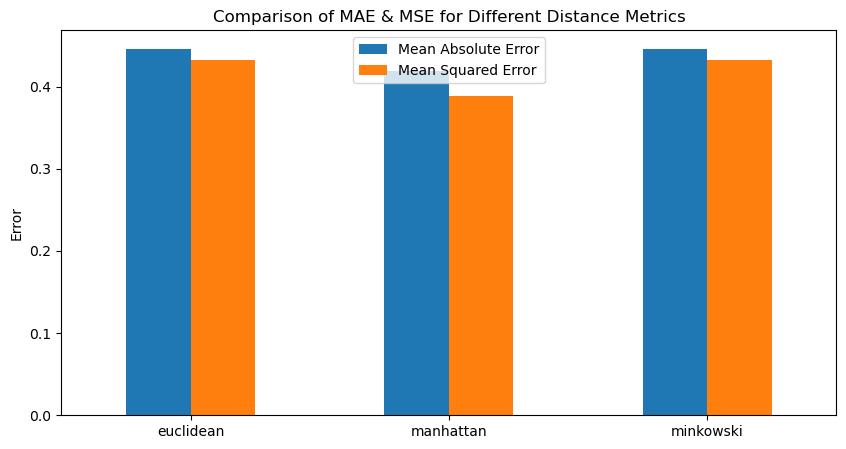

In [35]:
#42. Train a KNN Regressor and analyze the effect of different distance metrics on prediction error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Different distance metrics
metrics = ['euclidean', 'manhattan', 'minkowski']
errors = {}

# Train KNN Regressor with different distance metrics
for metric in metrics:
    knn = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    
    # Calculate errors
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Store results
    errors[metric] = {'MAE': mae, 'MSE': mse}

# Convert results to DataFrame and display
errors_df = pd.DataFrame(errors).T
print("Effect of Distance Metrics on Prediction Error:\n")
print(errors_df)

# Plot comparison
errors_df.plot(kind='bar', figsize=(10, 5), title="Comparison of MAE & MSE for Different Distance Metrics")
plt.ylabel("Error")
plt.xticks(rotation=0)
plt.legend(["Mean Absolute Error", "Mean Squared Error"])
plt.show()


ROC-AUC Score: 0.9788


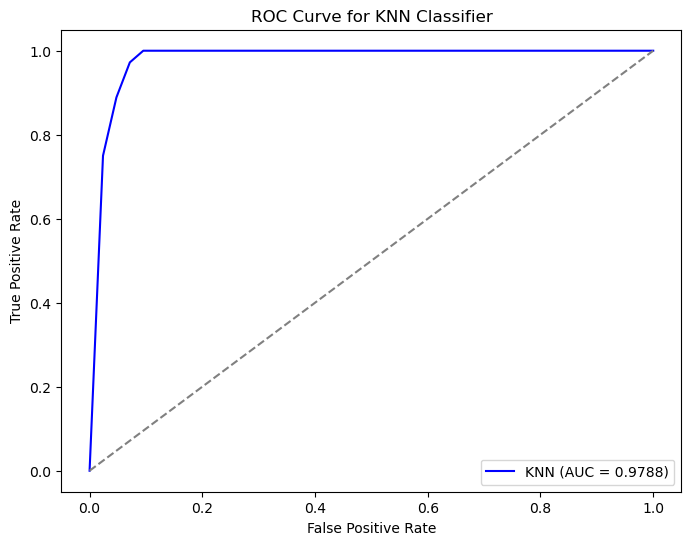

In [39]:
#43. Train a KNN Classifier and evaluate using ROC-AUC score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN Classifier (Choosing K=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict probabilities for ROC curve
y_probs = knn.predict_proba(X_test_scaled)[:, 1]  # Probability of positive class

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNN Classifier")
plt.legend(loc="lower right")
plt.show()


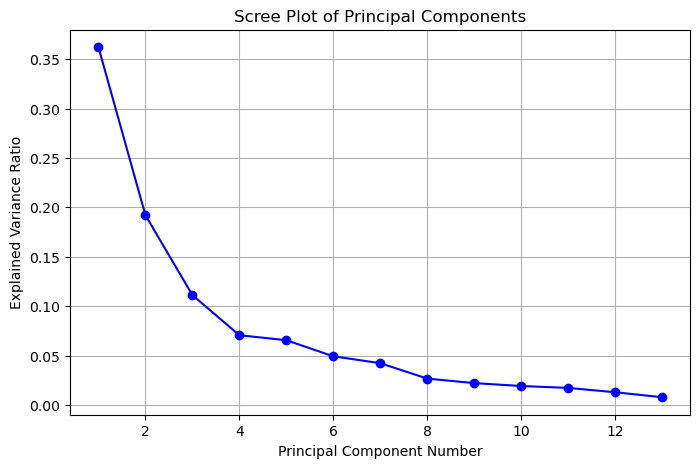

Cumulative Explained Variance:
 [0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


In [43]:
#44. Train a PCA model and visualize the variance captured by each principal component
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

# Load the Wine dataset
data = load_wine()
X, y = data.data, data.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=X.shape[1])  # Keep all components
X_pca = pca.fit_transform(X_scaled)

# Get explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot Scree plot (Explained variance per component)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot of Principal Components')
plt.grid()
plt.show()

# Print cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative Explained Variance:\n", cumulative_variance)


In [47]:
#45. Train a KNN Classifier and perform feature selection before training
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score

# Load the Wine dataset
data = load_wine()
X, y = data.data, data.target

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN Classifier (Before Feature Selection)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
accuracy_before = accuracy_score(y_test, y_pred)
print(f"Accuracy Before Feature Selection: {accuracy_before:.4f}")

# Feature Selection (Select Top 5 Features using Chi-Square test)
selector = SelectKBest(score_func=chi2, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Standardize selected features
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

# Train KNN Classifier (After Feature Selection)
knn.fit(X_train_selected_scaled, y_train)
y_pred_selected = knn.predict(X_test_selected_scaled)
accuracy_after = accuracy_score(y_test, y_pred_selected)
print(f"Accuracy After Feature Selection: {accuracy_after:.4f}")

# Show selected features
selected_features = np.array(data.feature_names)[selector.get_support()]
print("Selected Features:", selected_features)


Accuracy Before Feature Selection: 0.9722
Accuracy After Feature Selection: 0.9722
Selected Features: ['alcalinity_of_ash' 'magnesium' 'flavanoids' 'color_intensity' 'proline']


Reconstruction Error (MSE): 0.1984


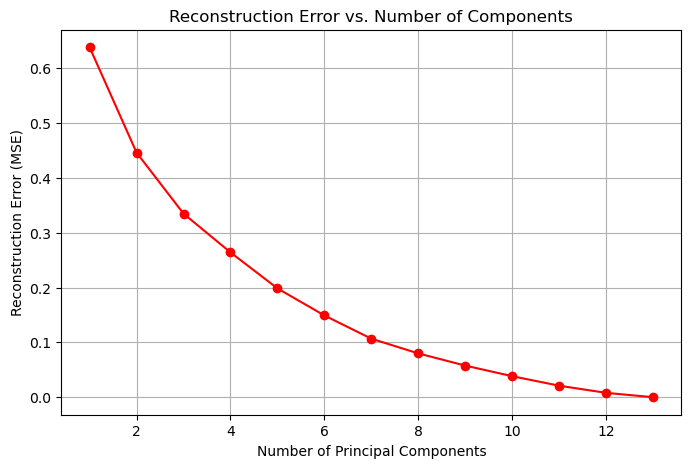

In [51]:
#46. Train a PCA model and visualize the data reconstruction error after reducing dimensions
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.metrics import mean_squared_error

# Load the Wine dataset
data = load_wine()
X, y = data.data, data.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensions using PCA (Keep 5 principal components)
n_components = 5
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Reconstruct data from PCA components
X_reconstructed = pca.inverse_transform(X_pca)

# Compute reconstruction error (Mean Squared Error)
reconstruction_error = mean_squared_error(X_scaled, X_reconstructed)
print(f"Reconstruction Error (MSE): {reconstruction_error:.4f}")

# Plot reconstruction error for different number of components
mse_errors = []
components_range = range(1, X.shape[1] + 1)

for n in components_range:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_scaled)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse_errors.append(mean_squared_error(X_scaled, X_reconstructed))

plt.figure(figsize=(8, 5))
plt.plot(components_range, mse_errors, marker='o', linestyle='-', color='r')
plt.xlabel("Number of Principal Components")
plt.ylabel("Reconstruction Error (MSE)")
plt.title("Reconstruction Error vs. Number of Components")
plt.grid()
plt.show()


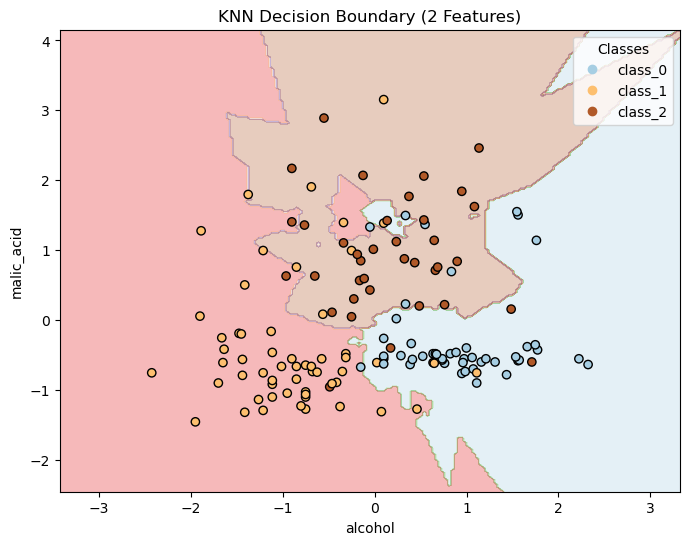

In [61]:
#47. Train a KNN Classifier and visualize the decision boundary
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
data = load_wine()
X = data.data[:, :2]  # Select only the first two features
y = data.target        # Select the target labels

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Create a mesh grid for decision boundary visualization
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

#Predict class for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

#Plot the training points
scatter = plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.Paired)

#Set labels and title
plt.xlabel(data.feature_names[0])  # Feature 1 name
plt.ylabel(data.feature_names[1])  # Feature 2 name
plt.title("KNN Decision Boundary (2 Features)")

#Fix legend issue
handles, _ = scatter.legend_elements()  # Get legend handles
labels = data.target_names             # Get target class names
plt.legend(handles, labels, title="Classes")

plt.show()


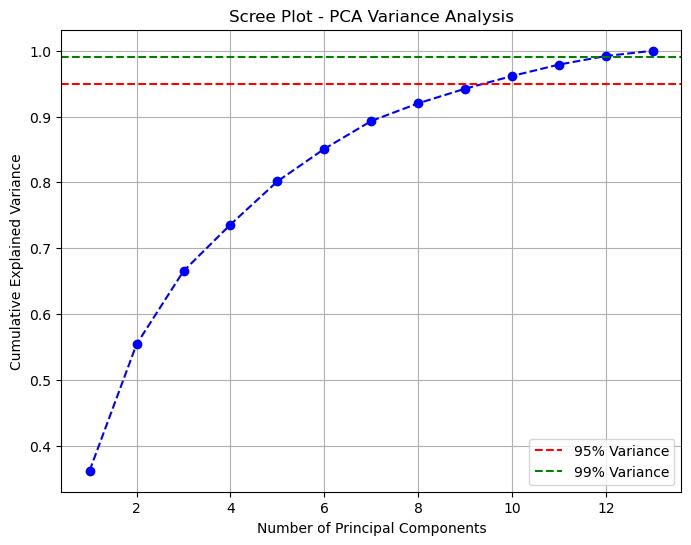

In [65]:
#48 Train a PCA model and analyze the effect of different numbers of components on data variance.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Wine dataset
data = load_wine()
X = data.data  # Features
y = data.target  # Target variable

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)  # Cumulative sum of explained variance

# Plot Scree Plot (Explained Variance vs. Number of Components)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')

# Add labels and title
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot - PCA Variance Analysis")
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance")
plt.axhline(y=0.99, color='g', linestyle='--', label="99% Variance")
plt.legend()
plt.grid()
plt.show()
